In [62]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [121]:
image = cv2.imread("salt_pepper.png")

In [122]:
# convert to greyscale 1-channel
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [123]:
cv2.imshow("original image", image)
cv2.waitKey(0)

-1

In [124]:
# remove salt and pepper noise
image_blur = cv2.medianBlur(image,5)

In [125]:
cv2.imshow("original image", image)
cv2.imshow("remove noise", image_blur)
cv2.waitKey(0)

-1

In [126]:
# extract background
kernel = np.ones((29,29),np.uint8)
background = cv2.morphologyEx(image_blur,cv2.MORPH_OPEN,kernel) 

In [127]:
cv2.imshow("background", background)
cv2.waitKey(0)

-1

In [128]:
# correct non-uniform illumination
image2 = image_blur - background

In [129]:
cv2.imshow("original image", image)
cv2.imshow("corrected background", image2)
cv2.waitKey(0)

-1

In [130]:
_ ,image_thresh = cv2.threshold(image2,60,255,cv2.THRESH_BINARY)

In [131]:
cv2.imshow("corrected background", image2)
cv2.imshow("binary image", image_thresh)
cv2.waitKey(0)

-1

In [132]:
# remove noises
kernel = np.ones((5,5),np.uint8)
image3 = cv2.morphologyEx(image_thresh,cv2.MORPH_OPEN,kernel)

In [133]:
cv2.imshow("binary image", image_thresh)
cv2.imshow("remove noise", image3)
cv2.waitKey(0)

-1

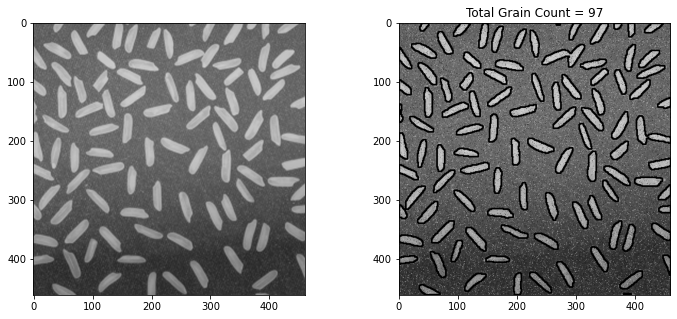

In [134]:
cnts = cv2.findContours(image3.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
def display(img,count,cmap="gray"):
    f_image = cv2.imread("original.png")
    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(f_image,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Total Grain Count = {}".format(count))

for (i, c) in enumerate(cnts):
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)

display(image,len(cnts))